In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pylab 
import scipy.stats as stats
import statsmodels.api as sm

## LATER model

In [20]:
def later_model(theta, mu, sigma, ntrial, Tmax):
    
    r = np.random.normal(mu, sigma, ntrial) # every trial draws a rate r
    T = theta / r
    T[(T > Tmax) | (r <= 0)] = Tmax
    
    return T # reaction time array

In [29]:
# taking parameters from https://www.sciencedirect.com/science/article/pii/S0149763415301226
theta = 500, mu = 4.0, sigma = 0.33, ntrial = 5000, Tmax = 1000
T = later_model(theta, mu, sigma, ntrial, Tmax)
T.shape

(5000,)

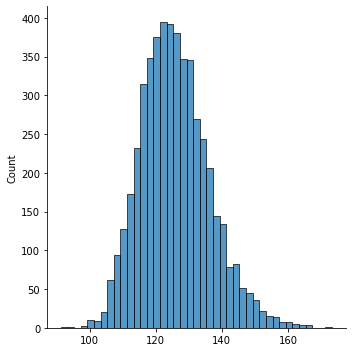

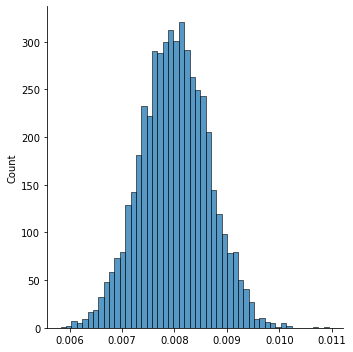

In [65]:
axes[0] = sns.displot(T, binwidth=2)
axes[1] = sns.displot(1/T)

# What pattern do you see? 
# - T is a bit skewed in distribution, while 1/T is mostly Gaussian
# Is this what you expect?
# - Probably yes. 1/T = r/theta, which should inherit the normal distribution of r. I don't really know about T.

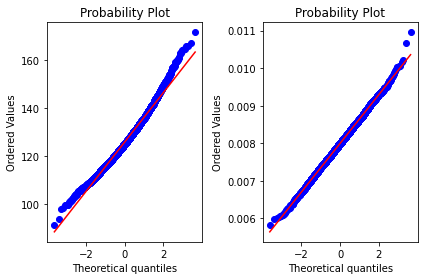

In [66]:
plt.subplot(121)
stats.probplot(T, dist="norm", plot=pylab);
plt.subplot(122)
stats.probplot(1/T, dist="norm", plot=pylab);
plt.tight_layout()

# What pattern emerges?
# 1/T is mostly Gaussian, but T is deviating a bit

## DDM model

In [106]:
def ddm_model(theta, mu, sigma, ntrial): # deleted Tmax
    
    T = []; iota_time = 0.01
    for itrial in np.arange(ntrial):
        sum_dy = 0; nstep = 0; 
        
        while sum_dy < theta and sum_dy > -1*theta: # equal boundary distance above and below
            dy = np.random.normal(mu, sigma, 1) # every step draws a new dy
            dy = dy * iota_time
            sum_dy = sum_dy + dy
            nstep = nstep + iota_time
        T.append(nstep)
    
    T = np.array(T)
    return T # reaction time array

In [107]:
T = ddm_model(500, 4, 0.33, 1000)

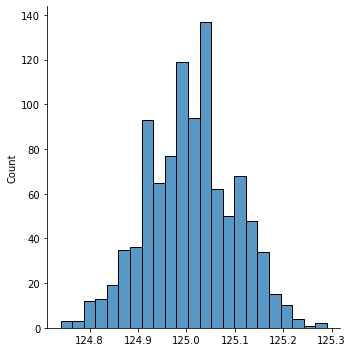

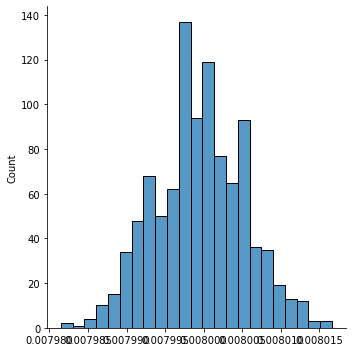

In [110]:
axes[0] = sns.displot(T)
axes[1] = sns.displot(1/T)

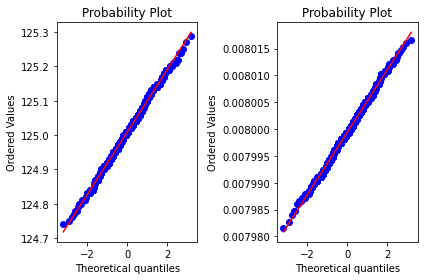

In [111]:
plt.subplot(121)
stats.probplot(T, dist="norm", plot=pylab);
plt.subplot(122)
stats.probplot(1/T, dist="norm", plot=pylab);
plt.tight_layout()

# Any differences?
# Distribution of T and 1/T both look Gaussian
# with their value concentrated towards the median value predicted by LATER model

## Race model

In [3]:
def race_model(theta, mu1, mu2, sigma1, sigma2, ntrial): 
    
    T = []; iota_time = 0.01; decision = []
    for itrial in np.arange(ntrial):
        sum_dy1 = 0; sum_dy2 = 0; nstep = 0;
        
        while np.max([sum_dy1, sum_dy2]) < theta and np.min([sum_dy1, sum_dy2]) > -1*theta: 
            dy1 = np.random.normal(mu1, sigma1, 1); dy2 = np.random.normal(mu2, sigma2, 1)
            dy1 = dy1 * iota_time; dy2 = dy2 * iota_time
            sum_dy1 = sum_dy1 + dy1; sum_dy2 = sum_dy2 + dy2
            nstep = nstep + iota_time
        T.append(nstep)
        decision.append(1 + np.argmax([np.abs(sum_dy1), np.abs(sum_dy2)])) # whoever has higher absolute value is the decision
    
    T = np.array(T); decision = np.array(decision)
    return T, decision

In [4]:
T, decision = race_model(500, 4,3, 0.33,100, 500)

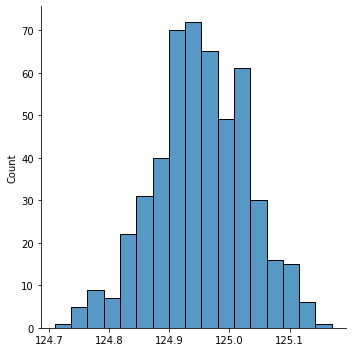

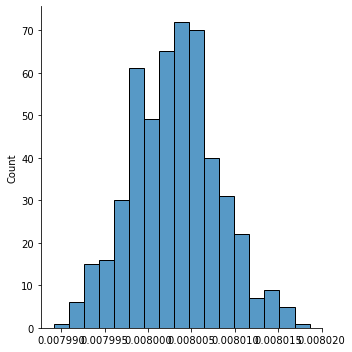

In [178]:
axes[0] = sns.displot(T)
axes[1] = sns.displot(1/T)

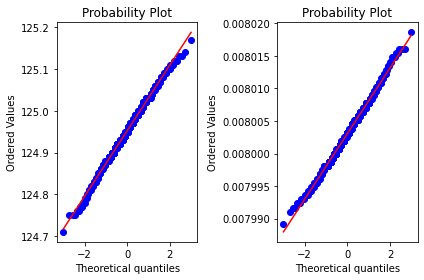

In [179]:
plt.subplot(121)
stats.probplot(T, dist="norm", plot=pylab);
plt.subplot(122)
stats.probplot(1/T, dist="norm", plot=pylab);
plt.tight_layout()

# Any differences?
# 1/T and T is no longer normally distributed. 
# depends on param, might be a difference btw reaction time distributions of decision == 1 or 2

In [180]:
unique, counts = np.unique(decision, return_counts=True)
dict(zip(unique, counts))

{1: 257, 2: 243}

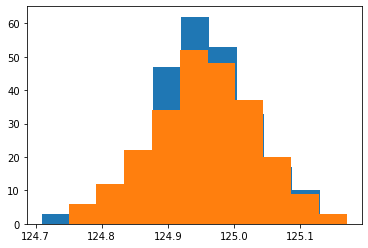

In [181]:
plt.hist(T[decision == 1]);
plt.hist(T[decision == 2]);